# <span style=color:grey> Why does a Business Needs Business Forecasting? </span>

***
#### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Fira Code; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: font-size: 25px"> Every business is looking for strategies to improve its profits. Data science professionals play a major role in providing the most accurate predictions for any given time. The data generated by a company is always handy for analyzing the future behaviour of target customers. By predicting future business trends, a business can make better decisions to improve its future performance.<br> <br> I hope you have understood why a business today needs to use business forecasting techniques. Forecasting sales, revenue or expenditure are some use cases of business forecasting. So, in the section below, I will take you through a task of business forecasting where we will aim to predict the quarterly revenue of Adidas. The data I am using for this task is collected manually from quarterly sales reports from Adidas.</div>
***

## <span stylr=color:white><b><u> Business Forecasting in Python </b></u> </span>

#### <span style= color: grey> Let’s get started with the task of business forecasting by importing the necessary Python libraries and the dataset: </span>

In [27]:
from keyword import kwlist
from multiprocessing.spawn import import_main_path
import pandas as pd
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

data = pd.read_csv("adidas quarterly sales.csv")
print(data)

   Time Period  Revenue
0       2000Q1     1517
1       2000Q2     1248
2       2000Q3     1677
3       2000Q4     1393
4       2001Q1     1558
..         ...      ...
83      2020Q4     5142
84      2021Q1     5268
85      2021Q2     5077
86      2021Q3     5752
87      2021Q4     5137

[88 rows x 2 columns]


<span style=color:grey> The dataset contains two coloumns: Time Period and Revenue. The Time Period column contains the quaterly revenue of Adidas from 2000 to 2021, an the Revenue column contains the sales revenue in millions (euros). Let's have a look at the quaterly sales revenue of Adidas: </span> 

In [28]:
import plotly.express as px
figure = px.line(data, x='Time Period', y='Revenue', title= "Quarterly Sales Revenue of Adidas in Millions")

figure.show()

<span style=color:grey> The Sales revenue data of Adidas is seasonal as the quaterly revenue increases and decreases every quarter. Below is how we can check the seasonality of any time series data: </span>

<Figure size 640x480 with 0 Axes>

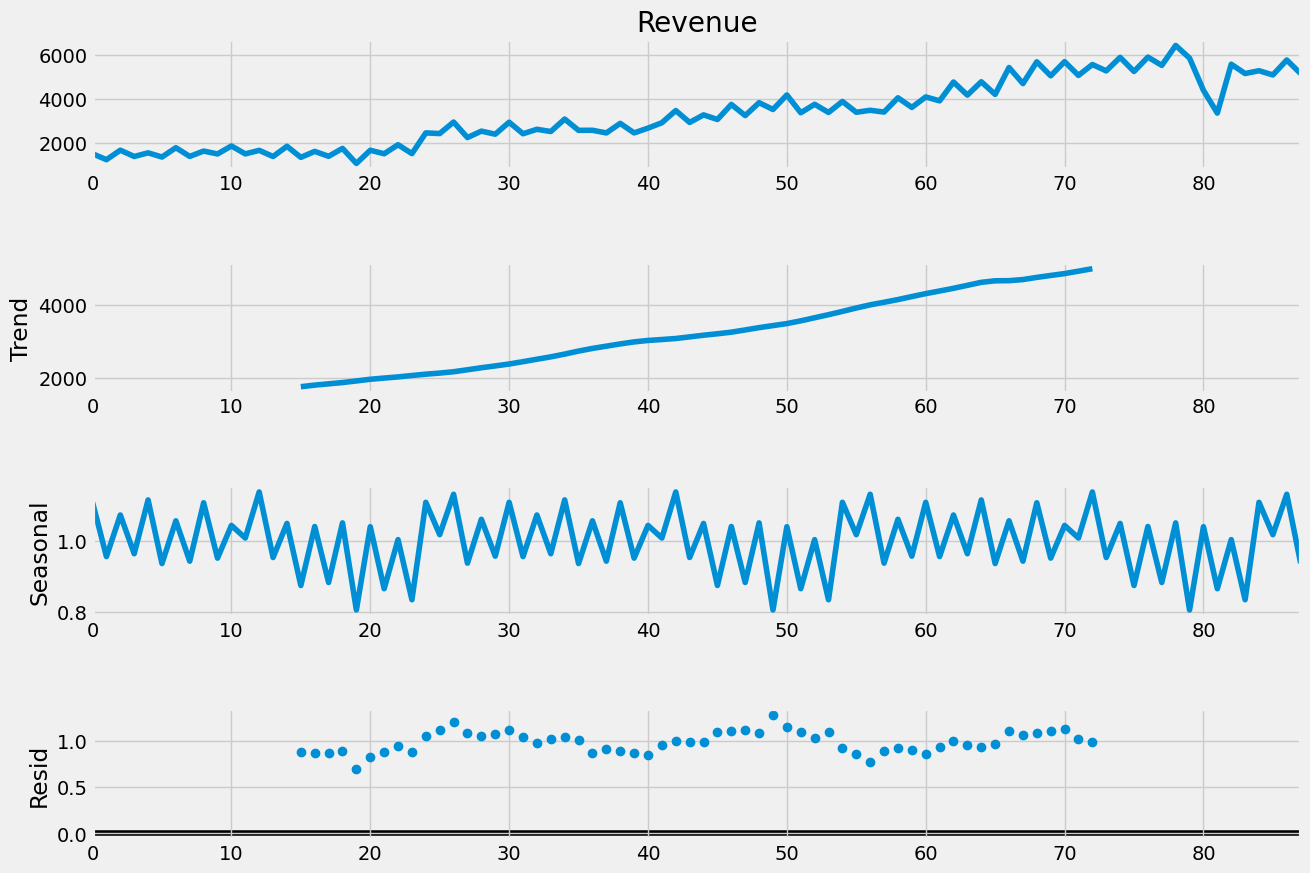

In [29]:
result = seasonal_decompose(data["Revenue"],model='multiplicative', period = 30)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<span style=color:grey>I will use the Seasonal ARIMA (SARIMA) model to forecast the quarterly sales revenue of Adidas. Before using the SARIMA model, it is necessary to find the p, d, and q values.<br>As the data is not stationary, the value of d is 1. To find the values of p and q, we can use the autocorrelation and partial autocorrelation plots:</span>

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

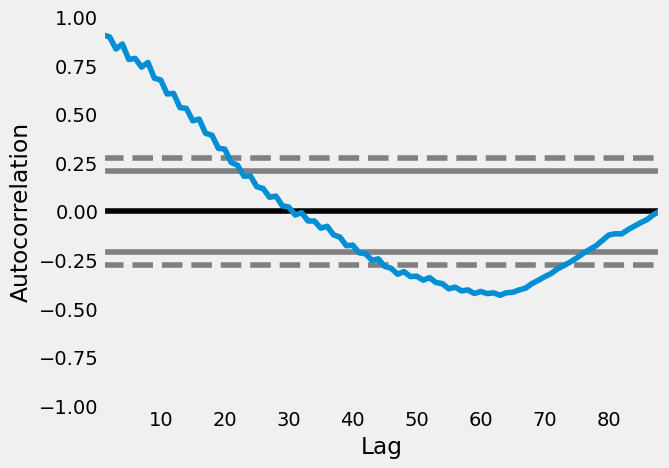

In [30]:
pd.plotting.autocorrelation_plot(data['Revenue'])

c:\Tools\Python\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



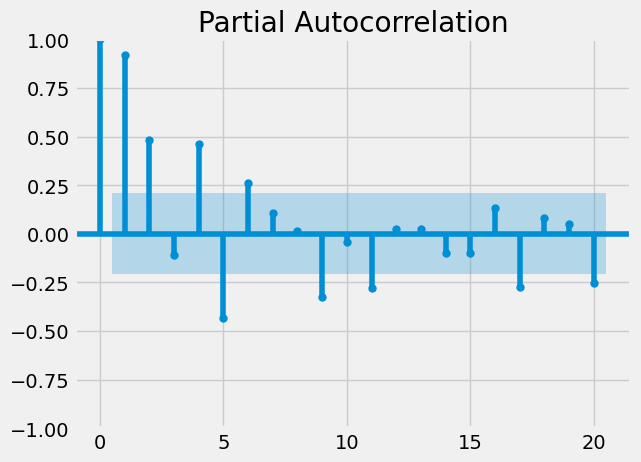

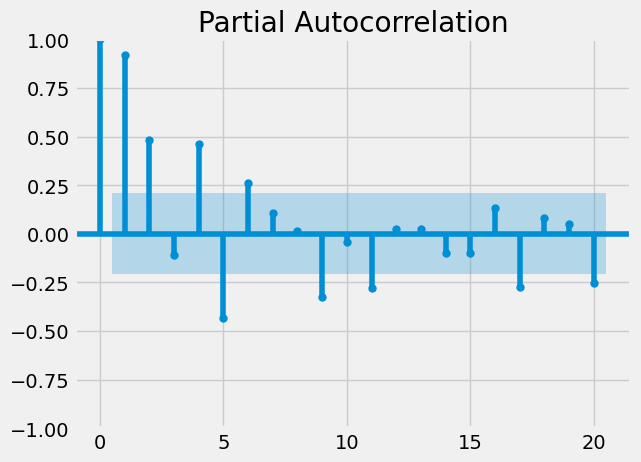

In [31]:
plot_pacf(data["Revenue"], lags =  20)

<span style=color:grey>Now here’s how to train a SARIMA model to predict the quarterly revenue of Adidas:</span>

In [32]:
model=sm.tsa.statespace.SARIMAX(data['Revenue'],
                                order=(1,1,1),
                                seasonal_order=(1,1,1, 12))
model=model.fit()
print(model.summary())

c:\Tools\Python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Tools\Python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -548.282
Date:                            Sun, 09 Oct 2022   AIC                           1106.564
Time:                                    16:57:21   BIC                           1118.152
Sample:                                         0   HQIC                          1111.191
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7176      0.053     13.636      0.000       0.614       0.821
ma.L1         -0.9981      0.544   

<span style=color:grey>Now let’s forecast the quarterly revenue of Adidas for the next eight quarters: </span>

In [33]:
predictions = model.predict(len(data), len(data)+7)
print(predictions)

88    5821.163603
89    5422.105315
90    6515.955818
91    5899.909441
92    6275.658375
93    5667.940860
94    6646.275007
95    6105.788588
Name: predicted_mean, dtype: float64


<span style=color:grey>Here’s how we can plot the predictions:</span>

<AxesSubplot: >

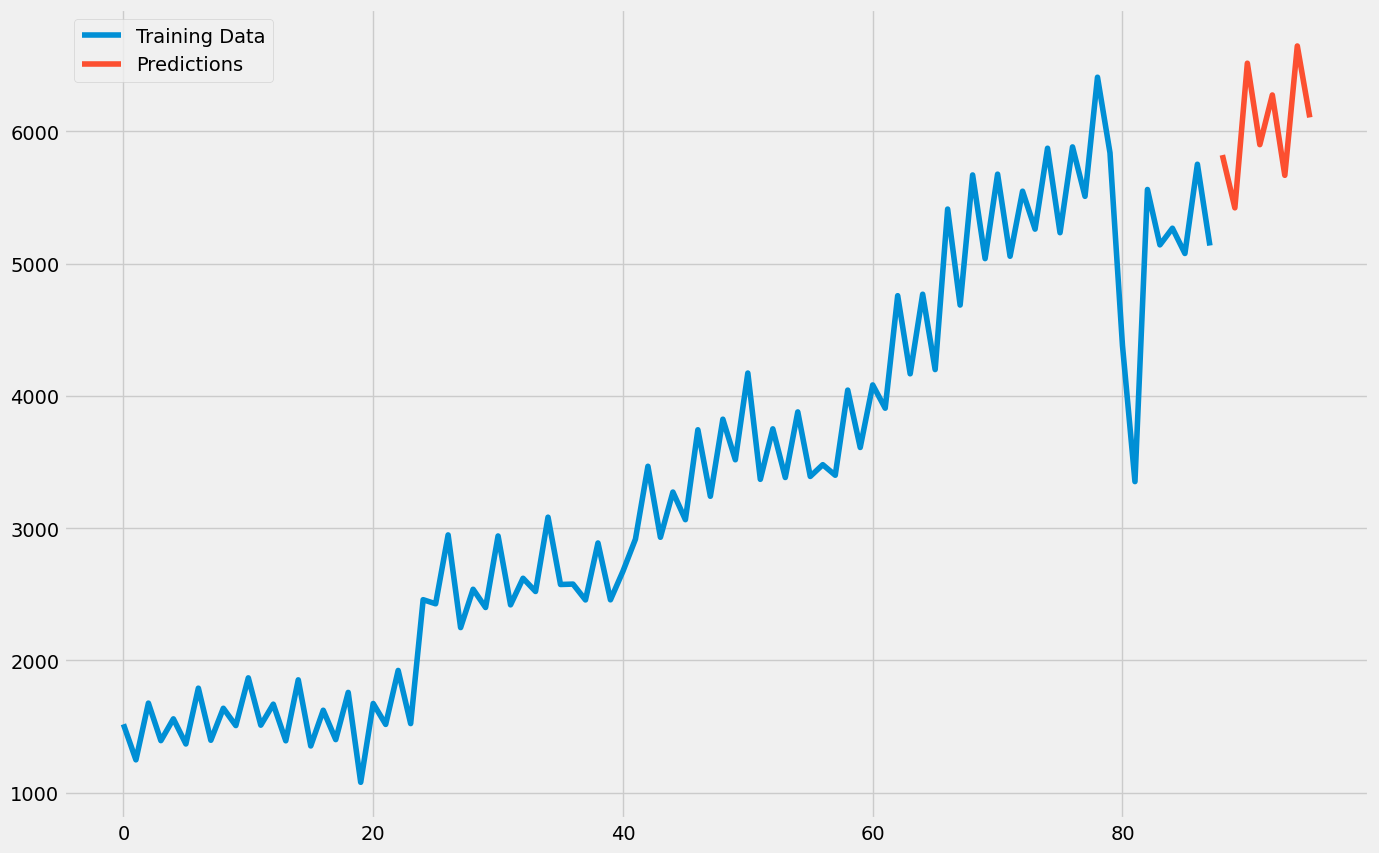

In [34]:
data["Revenue"].plot(legend=True, 
                     label="Training Data", 
                     figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

### Summary

<span style=color:grey>So this is how you can perform business forecasting using the Python programming language. In Business Forecasting, we aim to forecast future sales, expenditure, or revenue by using the historical Time Series data generated by the business. I hope you liked this article on Business Forecasting using Python.</span>